In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [214]:
# File paths 
file_paths = {
    "total_spending": "historical_spending_total_expected_spending.csv",
    "avg_spending": "historical_spending_average_expected_spending.csv",
    "percent_celebrating": "historical_spending_percent_celebrating.csv",
    "gift_trends_total_spending": "historical_gift_trends_total_expected_spending.csv",
    "gift_trends_per_person": "historical_gift_trends_per_person_spending.csv",
    "gift_trends_percent_buying": "historical_gift_trends_percent_buying.csv",
    "planned_gifts_age": "planned_gifts_age.csv",
    "planned_gifts_gender": "planned_gifts_gender.csv",
    "spending_or_celebrating_age_1": "spending_or_celebrating_age_1.csv",
    "spending_or_celebrating_age_2": "spending_or_celebrating_age_2.csv",
    "spending_or_celebrating_gender_1": "spending_or_celebrating_gender_1.csv",
    "spending_or_celebrating_gender_2": "spending_or_celebrating_gender_2.csv",

}

# Load all datasets into a dictionary
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display first few rows of each dataset
for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.head())  # Works in Jupyter Notebook
    print("\n")


Dataset: total_spending


,Unnamed: 0,Total Expected Valentine's Day Spending (in billions)
0,2009,$14.7B
1,2010,$14.1B
2,2011,$15.7B
3,2012,$17.6B
4,2013,$18.6B




Dataset: avg_spending


,Unnamed: 0,Per person Expected Valentines Day Spend
0,2009,$102.50
1,2010,$103.00
2,2011,$116.21
3,2012,$126.03
4,2013,$130.97




Dataset: percent_celebrating


,Unnamed: 0,Percent celebrating
0,2009,63%
1,2010,60%
2,2011,58%
3,2012,59%
4,2013,60%




Dataset: gift_trends_total_spending


,Unnamed: 0,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2010,$1.2B,$1.7B,$3.0B,$0.8B,$3.3B,$1.5B,$1.2B
1,2011,$1.5B,$1.7B,$3.5B,$1.1B,$3.4B,$1.6B,$1.5B
2,2012,$1.5B,$1.9B,$4.1B,$1.0B,$3.6B,$1.5B,$1.2B
3,2013,$1.7B,$1.9B,$4.4B,$1.2B,$4.0B,$1.6B,$1.5B
4,2014,$1.4B,$1.9B,$3.9B,$1.0B,$3.5B,$1.7B,$1.2B




Dataset: gift_trends_per_person


,Unnamed: 0,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2010,$8.60,$12.33,$21.52,$5.91,$23.76,$10.93,$8.42
1,2011,$10.75,$12.62,$26.18,$8.09,$24.86,$12.00,$11.21
2,2012,$10.85,$13.49,$29.60,$6.93,$25.66,$10.42,$8.43
3,2013,$11.64,$13.48,$30.94,$8.32,$27.93,$11.46,$10.23
4,2014,$10.80,$15.00,$30.58,$7.97,$27.48,$13.37,$9.00




Dataset: gift_trends_percent_buying


,Unnamed: 0,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2010,47%,36%,15%,55%,36%,14%,11%
1,2011,48%,34%,17%,52%,35%,14%,13%
2,2012,51%,36%,19%,52%,36%,15%,13%
3,2013,51%,37%,20%,55%,36%,16%,15%
4,2014,49%,37%,19%,51%,37%,16%,14%




Dataset: planned_gifts_age


,Unnamed: 0,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,18-24,70%,50%,33%,33%,41%,33%,23%
1,25-34,62%,44%,34%,33%,37%,27%,19%
2,35-44,58%,41%,29%,42%,30%,26%,22%
3,45-54,60%,37%,20%,42%,31%,20%,23%
4,55-64,50%,32%,13%,43%,29%,19%,20%




Dataset: planned_gifts_gender


,Unnamed: 0,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,Men,52%,56%,30%,37%,33%,20%,18%
1,Women,59%,19%,14%,43%,29%,24%,24%




Dataset: spending_or_celebrating_age_1


,Unnamed: 0,Age
0,18-24,51%
1,25-34,40%
2,35-44,31%
3,45-54,19%
4,55-64,18%




Dataset: spending_or_celebrating_age_2


,Unnamed: 0,18-24,25-34,35-44,45-54,55-64,65+
0,"Purchase ""anti-Valentine's Day"" gifts",5%,4%,5%,3%,0%,0%
1,Treat yourself,29%,24%,16%,7%,8%,4%
2,Plan a get-together,22%,14%,8%,5%,5%,4%




Dataset: spending_or_celebrating_gender_1


,Unnamed: 0,Gender
0,Men,27%
1,Women,27%




Dataset: spending_or_celebrating_gender_2


,Unnamed: 0,Men,Women
0,"Purchase ""anti-Valentine's Day"" gifts",3%,2%
1,Treat yourself,11%,16%
2,Plan a get-together,10%,8%


In [215]:
# Helper function to clean numerical columns
def clean_numeric_column(df, column_name, remove_chars=["$", "B", "%"]):
    """Removes unwanted characters ($, B for billions, % for percentages) and converts to float"""
    if column_name in df.columns:
        df[column_name] = df[column_name].replace(f"[{''.join(remove_chars)}]", "", regex=True).astype(float)

# List of datasets that contain yearly data (these will be merged)
yearly_datasets = ["total_spending", "avg_spending", "percent_celebrating", "gift_trends_total_spending", 
                   "gift_trends_per_person", "gift_trends_percent_buying"]

# Standardize "Year" column only in yearly datasets
for name in yearly_datasets:
    df = datasets[name]
    df.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")  # Convert to numeric, keep NaN as Int64

# Apply cleaning to known numeric columns
numeric_columns = {
    "total_spending": ["Total_Spending"],
    "avg_spending": ["Average_Spending"],
    "percent_celebrating": ["Percent_Celebrating"]
}

for dataset_name, columns in numeric_columns.items():
    for col in columns:
        clean_numeric_column(datasets[dataset_name], col)

print("✅ Data Cleaning Complete!")



✅ Data Cleaning Complete!


In [216]:
merged_df = datasets["total_spending"]
for key in yearly_datasets:
    if key != "total_spending":  # Merge all other yearly datasets
        merged_df = merged_df.merge(datasets[key], on="Year", how="outer")

print("✅ Merging Complete!")
merged_df.to_csv("merged_valentines_data.csv", index=False)
merged_df

✅ Merging Complete!


,Year,Total Expected Valentine's Day Spending (in billions),Per person Expected Valentines Day Spend,Percent celebrating,Candy_x,Flowers_x,Jewelry_x,Greeting cards_x,An evening out_x,Clothing_x,...,An evening out_y,Clothing_y,Gift cards_y,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2009,$14.7B,$102.50,63%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,$14.1B,$103.00,60%,$1.2B,$1.7B,$3.0B,$0.8B,$3.3B,$1.5B,...,$23.76,$10.93,$8.42,47%,36%,15%,55%,36%,14%,11%
2,2011,$15.7B,$116.21,58%,$1.5B,$1.7B,$3.5B,$1.1B,$3.4B,$1.6B,...,$24.86,$12.00,$11.21,48%,34%,17%,52%,35%,14%,13%
3,2012,$17.6B,$126.03,59%,$1.5B,$1.9B,$4.1B,$1.0B,$3.6B,$1.5B,...,$25.66,$10.42,$8.43,51%,36%,19%,52%,36%,15%,13%
4,2013,$18.6B,$130.97,60%,$1.7B,$1.9B,$4.4B,$1.2B,$4.0B,$1.6B,...,$27.93,$11.46,$10.23,51%,37%,20%,55%,36%,16%,15%
5,2014,$17.3B,$133.91,54%,$1.4B,$1.9B,$3.9B,$1.0B,$3.5B,$1.7B,...,$27.48,$13.37,$9.00,49%,37%,19%,51%,37%,16%,14%
6,2015,$18.9B,$142.31,55%,$1.7B,$2.1B,$4.8B,$1.0B,$3.6B,$2.0B,...,$27.27,$14.72,$11.05,53%,38%,21%,51%,35%,16%,15%
7,2016,$19.7B,$146.84,55%,$1.8B,$2.0B,$4.4B,$1.1B,$4.5B,$2.0B,...,$33.46,$15.05,$12.52,50%,36%,20%,48%,38%,17%,15%
8,2017,$18.2B,$136.57,54%,$1.7B,$2.0B,$4.3B,$1.0B,$3.8B,$1.9B,...,$28.46,$13.91,$10.23,50%,35%,19%,47%,37%,18%,16%
9,2018,$19.6B,$143.56,55%,$1.8B,$2.0B,$4.7B,$0.9B,$3.7B,$1.9B,...,$26.96,$14.04,$11.04,55%,36%,19%,46%,35%,17%,15%


In [217]:
# -----------------------------
# 4. Save & Display Merged Dataset
# -----------------------------
merged_df.to_csv("merged_valentines_data.csv", index=False)

# Display first few rows of the merged dataset
display(merged_df)

,Year,Total Expected Valentine's Day Spending (in billions),Per person Expected Valentines Day Spend,Percent celebrating,Candy_x,Flowers_x,Jewelry_x,Greeting cards_x,An evening out_x,Clothing_x,...,An evening out_y,Clothing_y,Gift cards_y,Candy,Flowers,Jewelry,Greeting cards,An evening out,Clothing,Gift cards
0,2009,$14.7B,$102.50,63%,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,$14.1B,$103.00,60%,$1.2B,$1.7B,$3.0B,$0.8B,$3.3B,$1.5B,...,$23.76,$10.93,$8.42,47%,36%,15%,55%,36%,14%,11%
2,2011,$15.7B,$116.21,58%,$1.5B,$1.7B,$3.5B,$1.1B,$3.4B,$1.6B,...,$24.86,$12.00,$11.21,48%,34%,17%,52%,35%,14%,13%
3,2012,$17.6B,$126.03,59%,$1.5B,$1.9B,$4.1B,$1.0B,$3.6B,$1.5B,...,$25.66,$10.42,$8.43,51%,36%,19%,52%,36%,15%,13%
4,2013,$18.6B,$130.97,60%,$1.7B,$1.9B,$4.4B,$1.2B,$4.0B,$1.6B,...,$27.93,$11.46,$10.23,51%,37%,20%,55%,36%,16%,15%
5,2014,$17.3B,$133.91,54%,$1.4B,$1.9B,$3.9B,$1.0B,$3.5B,$1.7B,...,$27.48,$13.37,$9.00,49%,37%,19%,51%,37%,16%,14%
6,2015,$18.9B,$142.31,55%,$1.7B,$2.1B,$4.8B,$1.0B,$3.6B,$2.0B,...,$27.27,$14.72,$11.05,53%,38%,21%,51%,35%,16%,15%
7,2016,$19.7B,$146.84,55%,$1.8B,$2.0B,$4.4B,$1.1B,$4.5B,$2.0B,...,$33.46,$15.05,$12.52,50%,36%,20%,48%,38%,17%,15%
8,2017,$18.2B,$136.57,54%,$1.7B,$2.0B,$4.3B,$1.0B,$3.8B,$1.9B,...,$28.46,$13.91,$10.23,50%,35%,19%,47%,37%,18%,16%
9,2018,$19.6B,$143.56,55%,$1.8B,$2.0B,$4.7B,$0.9B,$3.7B,$1.9B,...,$26.96,$14.04,$11.04,55%,36%,19%,46%,35%,17%,15%


In [218]:
# Check missing values
print("Missing Values in Dataset:")
print(merged_df.isnull().sum())


Missing Values in Dataset:
Year                                                     0
Total Expected Valentine's Day Spending (in billions)    0
Per person Expected Valentines Day Spend                 0
Percent celebrating                                      0
Candy_x                                                  1
Flowers_x                                                1
Jewelry_x                                                1
Greeting cards_x                                         1
An evening out_x                                         1
Clothing_x                                               1
Gift cards_x                                             1
Candy_y                                                  1
Flowers_y                                                1
Jewelry_y                                                1
Greeting cards_y                                         1
An evening out_y                                         1
Clothing_y                   

In [219]:
print("Column names in merged_df:")
print(merged_df.columns)


Column names in merged_df:
Index(['Year', 'Total Expected Valentine's Day Spending (in billions)',
       'Per person Expected Valentines Day Spend', 'Percent celebrating',
       'Candy_x', 'Flowers_x', 'Jewelry_x', 'Greeting cards_x',
       'An evening out_x', 'Clothing_x', 'Gift cards_x', 'Candy_y',
       'Flowers_y', 'Jewelry_y', 'Greeting cards_y', 'An evening out_y',
       'Clothing_y', 'Gift cards_y', 'Candy', 'Flowers', 'Jewelry',
       'Greeting cards', 'An evening out', 'Clothing', 'Gift cards'],
      dtype='object')


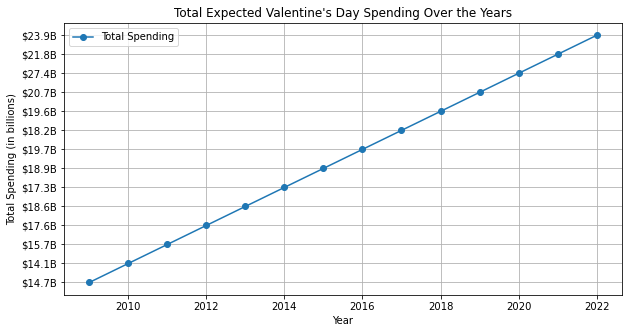

In [220]:
import matplotlib.pyplot as plt

# Plot Total Valentine's Day Spending Over the Years
plt.figure(figsize=(10, 5))
plt.plot(merged_df["Year"], merged_df["Total Expected Valentine's Day Spending (in billions)"], marker='o', linestyle='-', label="Total Spending")
plt.xlabel("Year")
plt.ylabel("Total Spending (in billions)")
plt.title("Total Expected Valentine's Day Spending Over the Years")
plt.legend()
plt.grid(True)
plt.show()


This is linear but let's check more to see if if there is a pattern or or not
We can use a polynomial regression to see if there is a pattern or not


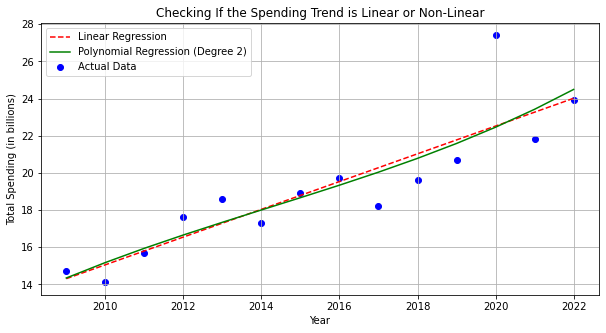

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Convert "Total Expected Valentine's Day Spending (in billions)" column to numeric format
merged_df["Total Expected Valentine's Day Spending (in billions)"] = (
    merged_df["Total Expected Valentine's Day Spending (in billions)"]
    .astype(str)  # Convert to string (in case there are mixed types)
    .str.replace("[\$,B]", "", regex=True)  # Remove $ and B
    .astype(float)  # Convert to float
)

# Prepare Data
X = merged_df["Year"].values.reshape(-1, 1)
y = merged_df["Total Expected Valentine's Day Spending (in billions)"].values

# ----------------------
# 1️⃣ Fit a Linear Regression Model
# ----------------------
linear_model = LinearRegression()
linear_model.fit(X, y)
linear_pred = linear_model.predict(X)

# ----------------------
# 2️⃣ Fit a Polynomial Regression Model (Degree 3)
# ----------------------
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_pred = poly_model.predict(X_poly)

# ----------------------
# 3️⃣ Compare Both Models on the Graph
# ----------------------
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")  # Actual Spending Data
plt.plot(X, linear_pred, color="red", linestyle="--", label="Linear Regression")
plt.plot(X, poly_pred, color="green", linestyle="-", label="Polynomial Regression (Degree 2)")
plt.xlabel("Year")
plt.ylabel("Total Spending (in billions)")
plt.title("Checking If the Spending Trend is Linear or Non-Linear")
plt.legend()
plt.grid(True)
plt.show()


   Year  Predicted_Spending (in billions)
0  2023                         24.758242
1  2024                         25.505055
2  2025                         26.251868


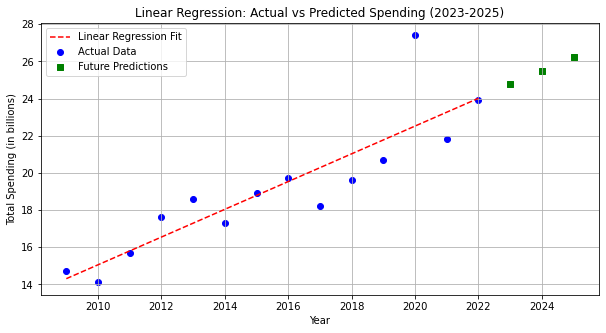

    Year  Total Expected Valentine's Day Spending (in billions)  \
0   2009                                               14.7       
1   2010                                               14.1       
2   2011                                               15.7       
3   2012                                               17.6       
4   2013                                               18.6       
5   2014                                               17.3       
6   2015                                               18.9       
7   2016                                               19.7       
8   2017                                               18.2       
9   2018                                               19.6       
10  2019                                               20.7       
11  2020                                               27.4       
12  2021                                               21.8       
13  2022                                               23.9   

In [222]:
# Predict Future Spending Using Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

# Ensure correct data types
merged_df["Year"] = merged_df["Year"].astype(int)
merged_df["Total Expected Valentine's Day Spending (in billions)"] = (
    merged_df["Total Expected Valentine's Day Spending (in billions)"]
    .astype(str)
    .str.replace("[\$,B]", "", regex=True)
    .astype(float)
)

# Prepare Data for Linear Regression Model
X = merged_df["Year"].values.reshape(-1, 1)
y = merged_df["Total Expected Valentine's Day Spending (in billions)"].values

# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict spending for future years (2023, 2024, 2025)
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_predictions = linear_model.predict(future_years)


# Store results in a DataFrame
future_df = pd.DataFrame({
    "Year": [2023, 2024, 2025],
    "Predicted_Spending (in billions)": future_predictions
})

# Print Predictions
print(future_df)

new_linear_pred_df = merged_df.append(future_df, ignore_index=True)

# Plot Actual vs. Predicted Spending
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")  # Actual Spending Data
plt.plot(X, linear_model.predict(X), color="red", linestyle="--", label="Linear Regression Fit")
plt.scatter(future_years, future_predictions, color="green", marker="s", label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Total Spending (in billions)")
plt.title("Linear Regression: Actual vs Predicted Spending (2023-2025)")
plt.legend()
plt.grid(True)
plt.show()
print(merged_df)

   Year  Predicted_per_person_spending
0  2023                     185.547253
1  2024                     191.426505
2  2025                     197.305758


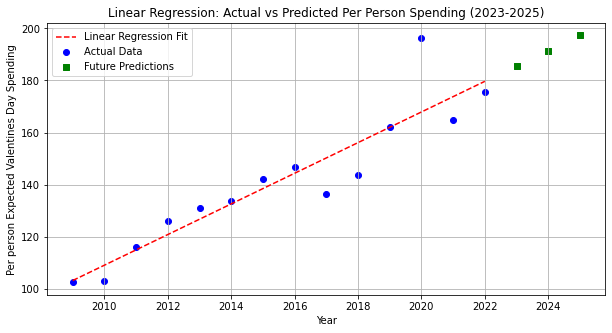

In [223]:
# Predict Per Person Future Spending Using Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

# Ensure correct data types
merged_df["Year"] = merged_df["Year"].astype(int)
merged_df["Per person Expected Valentines Day Spend"] = (
    merged_df["Per person Expected Valentines Day Spend"]
    .astype(str)
    .str.replace("[\$,B]", "", regex=True)
    .astype(float)
)

# Prepare Data for Linear Regression Model
X = merged_df["Year"].values.reshape(-1, 1)
y = merged_df["Per person Expected Valentines Day Spend"].values

# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict spending for future years (2023, 2024, 2025)
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_predictions = linear_model.predict(future_years)


# Store results in a DataFrame
future_df = pd.DataFrame({
    "Year": [2023, 2024, 2025],
    "Predicted_per_person_spending": future_predictions
})

# Print Predictions
print(future_df)

new_linear_pred_df = merged_df.append(future_df, ignore_index=True)

# Plot Actual vs. Predicted Spending
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")  # Actual Spending Data
plt.plot(X, linear_model.predict(X), color="red", linestyle="--", label="Linear Regression Fit")
plt.scatter(future_years, future_predictions, color="green", marker="s", label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Per person Expected Valentines Day Spending")
plt.title("Linear Regression: Actual vs Predicted Per Person Spending (2023-2025)")
plt.legend()
plt.grid(True)
plt.show()


   Year  Predicted_Percent_Celebrating
0  2023                      50.626374
1  2024                      49.909890
2  2025                      49.193407


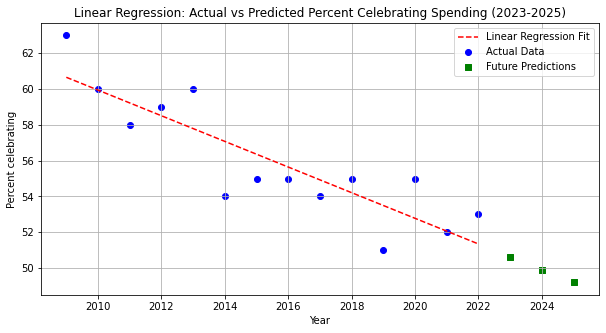

In [224]:
# Predict Celebrating Couples Using Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

# Ensure correct data types
merged_df["Year"] = merged_df["Year"].astype(int)
merged_df["Percent celebrating"] = (
    merged_df["Percent celebrating"]
    .astype(str)
    .str.replace("[\$,B%]", "", regex=True)
    .astype(float)
)

# Prepare Data for Linear Regression Model
X = merged_df["Year"].values.reshape(-1, 1)
y = merged_df["Percent celebrating"].values

# Fit Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict spending for future years (2023, 2024, 2025)
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_predictions = linear_model.predict(future_years)


# Store results in a DataFrame
future_df = pd.DataFrame({
    "Year": [2023, 2024, 2025],
    "Predicted_Percent_Celebrating": future_predictions
})

# Print Predictions
print(future_df)

new_linear_pred_df = merged_df.append(future_df, ignore_index=True)

# Plot Actual vs. Predicted Spending
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")  # Actual Spending Data
plt.plot(X, linear_model.predict(X), color="red", linestyle="--", label="Linear Regression Fit")
plt.scatter(future_years, future_predictions, color="green", marker="s", label="Future Predictions")
plt.xlabel("Year")
plt.ylabel("Percent celebrating")
plt.title("Linear Regression: Actual vs Predicted Percent Celebrating Spending (2023-2025)")
plt.legend()
plt.grid(True)
plt.show()


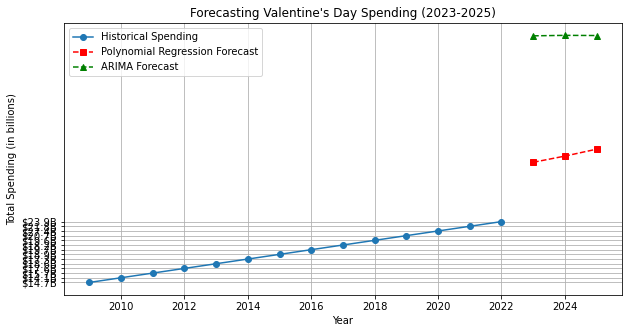


Polynomial Regression Predictions:
   Year  Predicted_Spending_Poly
0  2023                25.677393
1  2024                27.001565
2  2025                28.476511

ARIMA Predictions:
   Year  Predicted_Spending_ARIMA
0  2023                 52.700539
1  2024                 52.802843
2  2025                 52.767893


In [225]:
# # Predict Future Spending Using Polynomial, ARIMA, and Compare Both Models on the Graph


# -----------------------------
# 1️⃣ Polynomial Regression
# -----------------------------
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
# Predict for future years (2023, 2024, 2025)
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_X_poly = poly.transform(future_years)
predicted_spending_poly = poly_model.predict(future_X_poly)

# Store results in a DataFrame
future_poly_df = pd.DataFrame({"Year": [2023, 2024, 2025], "Predicted_Spending_Poly": predicted_spending_poly})

# -----------------------------
# 2️⃣ ARIMA Time-Series Forecasting
# -----------------------------
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (simple configuration)
arima_model = ARIMA(y, order=(1,1,1))
arima_result = arima_model.fit()

# Forecast for 2023–2025
forecast_arima = arima_result.forecast(steps=3)

# Store results in a DataFrame
future_arima_df = pd.DataFrame({"Year": [2023, 2024, 2025], "Predicted_Spending_ARIMA": forecast_arima})

# -----------------------------
# 3️⃣ Compare Predictions
# -----------------------------
plt.figure(figsize=(10, 5))
plt.plot(merged_df["Year"], merged_df["Total Expected Valentine's Day Spending (in billions)"], marker='o', linestyle='-', label="Historical Spending")
plt.plot(future_poly_df["Year"], future_poly_df["Predicted_Spending_Poly"], marker='s', linestyle='--', color='red', label="Polynomial Regression Forecast")
plt.plot(future_arima_df["Year"], future_arima_df["Predicted_Spending_ARIMA"], marker='^', linestyle='--', color='green', label="ARIMA Forecast")
plt.xlabel("Year")
plt.ylabel("Total Spending (in billions)")
plt.title("Forecasting Valentine's Day Spending (2023-2025)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 4️⃣ Display Forecasted Values
# -----------------------------
print("\nPolynomial Regression Predictions:")
print(future_poly_df)

print("\nARIMA Predictions:")
print(future_arima_df)


Polynomial regression expects a stronger increase (~6-8% per year).
ARIMA expects a steadier rise (~3-4% per year).


In [226]:

# Check available columns related to spending categories
print("Columns in dataset:", merged_df.columns)

# Select relevant spending categories (modify based on actual column names)
categories = ['Candy', 'Flowers', 'Jewelry',
       'Greeting cards', 'An evening out', 'Clothing', 'Gift cards']

Columns in dataset: Index(['Year', 'Total Expected Valentine's Day Spending (in billions)',
       'Per person Expected Valentines Day Spend', 'Percent celebrating',
       'Candy_x', 'Flowers_x', 'Jewelry_x', 'Greeting cards_x',
       'An evening out_x', 'Clothing_x', 'Gift cards_x', 'Candy_y',
       'Flowers_y', 'Jewelry_y', 'Greeting cards_y', 'An evening out_y',
       'Clothing_y', 'Gift cards_y', 'Candy', 'Flowers', 'Jewelry',
       'Greeting cards', 'An evening out', 'Clothing', 'Gift cards'],
      dtype='object')


Category: Candy
Mean Squared Error (MSE): 84.59270015773564
Root Mean Squared Error (RMSE): 9.197428997156523
R-squared (R2): 0.533163384645901


Category: Flowers
Mean Squared Error (MSE): 46.75007849230802
Root Mean Squared Error (RMSE): 6.837402905512298
R-squared (R2): 0.466770519989969


Category: Jewelry
Mean Squared Error (MSE): 10.727708006490227
Root Mean Squared Error (RMSE): 3.2753180008191918
R-squared (R2): 0.6035764009668017


Category: Greeting cards
Mean Squared Error (MSE): 112.58681318575312
Root Mean Squared Error (RMSE): 10.610693341424636
R-squared (R2): 0.3539344365731465


Category: An evening out
Mean Squared Error (MSE): 45.419466248396205
Root Mean Squared Error (RMSE): 6.739396578952467
R-squared (R2): 0.4945369415917751


Category: Clothing
Mean Squared Error (MSE): 7.417013343818169
Root Mean Squared Error (RMSE): 2.723419421208964
R-squared (R2): 0.6972017047722638


Category: Gift cards
Mean Squared Error (MSE): 6.68561616944799
Root Mean Squared Error (R

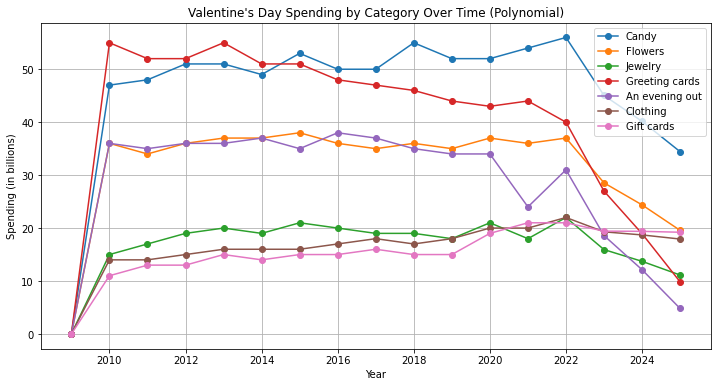

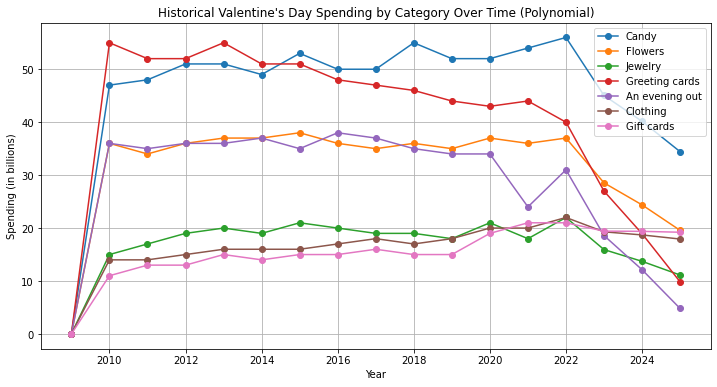

In [227]:
# Predict future values across categories using Polynomial Regression

# -----------------------------
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, column):
    if column in df.columns:
        df[column] = (
            df[column]
            .astype(str)
            .str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters except digits and decimal points
            .replace('', '0')  # Replace empty strings with '0'
            .astype(float)
        )
    else:
        print(f"Category {column} not found in merged_df")

# Apply cleaning and conversion to numeric for each category
for category in categories:
    clean_and_convert_to_numeric(merged_df, category)

# Prepare Data
X = merged_df["Year"].values.reshape(-1, 1)

# Fit Polynomial Regression Models for Each Category
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_poly_df = pd.DataFrame({"Year": [2023, 2024, 2025]})

for category in categories:
    if category in merged_df.columns:
        y = merged_df[category].values

        # Fit a Polynomial Regression Model (Degree 2)
        poly = PolynomialFeatures(degree=2)
        X_poly = poly.fit_transform(X)
        poly_model = LinearRegression()
        poly_model.fit(X_poly, y)
        poly_pred = poly_model.predict(X_poly)

        # Evaluate Model Performance
        mse = mean_squared_error(y, poly_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, poly_pred)
        print(f"Category: {category}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"R-squared (R2): {r2}")
        print("\n")

        # Forecast for future years
        future_X_poly = poly.transform(future_years)
        predicted_spending_poly = poly_model.predict(future_X_poly)

        # Store results in future_poly_df
        future_poly_df[category] = predicted_spending_poly

# Add future years to the DataFrame
for year in future_years.flatten():
    if year not in merged_df["Year"].values:
        new_row = {col: float('nan') for col in merged_df.columns}
        new_row["Year"] = year
        merged_df = merged_df.append(new_row, ignore_index=True)

# Fill in forecasted values for future years using future_poly_df
for category in categories:
    if category in merged_df.columns:
        for year in future_years.flatten():
            if year in future_poly_df["Year"].values:
                forecasted_value = future_poly_df.loc[future_poly_df["Year"] == year, category].values[0]
                merged_df.loc[merged_df["Year"] == year, category] = forecasted_value

# Print the DataFrame to verify the contents
print("Merged DataFrame with Forecasted Values (Polynomial):")
print(merged_df)

# Plot category-wise spending trends
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)
    else:
        print(f"Category {category} not found in merged_df for plotting")

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Valentine's Day Spending by Category Over Time (Polynomial)")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the Historical Data
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Historical Valentine's Day Spending by Category Over Time (Polynomial)")
plt.legend()
plt.grid(True)
plt.show()

Category: Candy
Mean Squared Error (MSE): 122.06562009419227
Root Mean Squared Error (RMSE): 11.048331099953163
R-squared (R2): 0.3263638490127919


Category: Flowers
Mean Squared Error (MSE): 68.98084772370423
Root Mean Squared Error (RMSE): 8.30547095134913
R-squared (R2): 0.21320727689443497


Category: Jewelry
Mean Squared Error (MSE): 17.88037676609111
Root Mean Squared Error (RMSE): 4.228519453200033
R-squared (R2): 0.3392620953706905


Category: Greeting cards
Mean Squared Error (MSE): 171.06248037676616
Root Mean Squared Error (RMSE): 13.07908560935229
R-squared (R2): 0.018379021142810426


Category: An evening out
Mean Squared Error (MSE): 85.10706436420764
Root Mean Squared Error (RMSE): 9.22534901042815
R-squared (R2): 0.05286255874490697


Category: Clothing
Mean Squared Error (MSE): 9.367660910518074
Root Mean Squared Error (RMSE): 3.0606634755422024
R-squared (R2): 0.6175668530594578


Category: Gift cards
Mean Squared Error (MSE): 7.57111459968607
Root Mean Squared Error

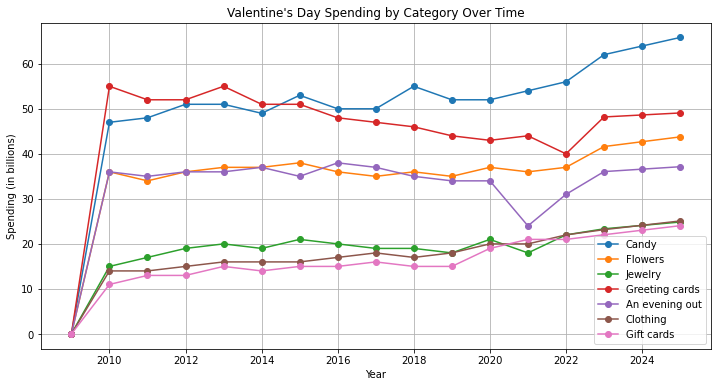

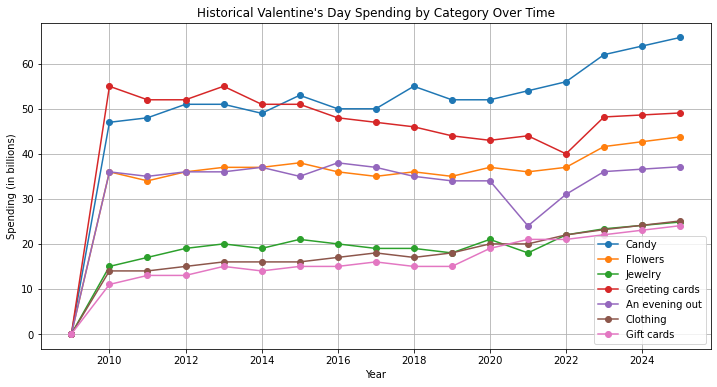

In [228]:
# Predict future spending across categories using Linear Regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, column):
    if column in df.columns:
        df[column] = (
            df[column]
            .astype(str)
            .str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters except digits and decimal points
            .replace('', '0')  # Replace empty strings with '0'
            .astype(float)
        )
    else:
        print(f"Category {column} not found in merged_df")

# Apply cleaning and conversion to numeric for each category
for category in categories:
    clean_and_convert_to_numeric(merged_df, category)

# Prepare Data
X = merged_df["Year"].values.reshape(-1, 1)

# Fit Linear Regression Models for Each Category
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_linear_df = pd.DataFrame({"Year": [2023, 2024, 2025]})

for category in categories:
    if category in merged_df.columns:
        y = merged_df[category].values

        # Fit a Linear Regression Model
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        linear_pred = linear_model.predict(X)

        # Evaluate Model Performance
        mse = mean_squared_error(y, linear_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, linear_pred)
        print(f"Category: {category}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"R-squared (R2): {r2}")
        print("\n")

        # Forecast for future years
        predicted_spending_linear = linear_model.predict(future_years)

        # Store results in future_linear_df
        future_linear_df[category] = predicted_spending_linear

# Add future years to the DataFrame
for year in future_years.flatten():
    if year not in merged_df["Year"].values:
        new_row = {col: float('nan') for col in merged_df.columns}
        new_row["Year"] = year
        merged_df = merged_df.append(new_row, ignore_index=True)

# Fill in forecasted values for future years using future_linear_df
for category in categories:
    if category in merged_df.columns:
        for year in future_years.flatten():
            if year in future_linear_df["Year"].values:
                forecasted_value = future_linear_df.loc[future_linear_df["Year"] == year, category].values[0]
                merged_df.loc[merged_df["Year"] == year, category] = forecasted_value




# Plot category-wise spending trends
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)
    else:
        print(f"Category {category} not found in merged_df for plotting")

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Valentine's Day Spending by Category Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the Historical Data
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Historical Valentine's Day Spending by Category Over Time")
plt.legend()
plt.grid(True)
plt.show()


# Save the merged DataFrame to a CSV file
merged_df.to_csv("valentines_day_spending_forecast.csv", index=False)

Category: Candy_x
Mean Squared Error (MSE): 0.10245211930926244
Root Mean Squared Error (RMSE): 0.32008142606102974
R-squared (R2): 0.6487560716352032


Category: Flowers_x
Mean Squared Error (MSE): 0.16677864992150537
Root Mean Squared Error (RMSE): 0.40838541835073566
R-squared (R2): 0.4209279825577493


Category: Jewelry_x
Mean Squared Error (MSE): 0.8904992150706564
Root Mean Squared Error (RMSE): 0.9436626595720827
R-squared (R2): 0.5352226289408339


Category: Greeting cards_x
Mean Squared Error (MSE): 0.06521193092621665
Root Mean Squared Error (RMSE): 0.25536626818398833
R-squared (R2): 0.23555391976444606


Category: An evening out_x
Mean Squared Error (MSE): 0.8375384615384505
Root Mean Squared Error (RMSE): 0.9151712744281534
R-squared (R2): 0.24032792604222164


Category: Clothing_x
Mean Squared Error (MSE): 0.11620408163265272
Root Mean Squared Error (RMSE): 0.34088719781278487
R-squared (R2): 0.7622795115332436


Category: Gift cards_x
Mean Squared Error (MSE): 0.10922762

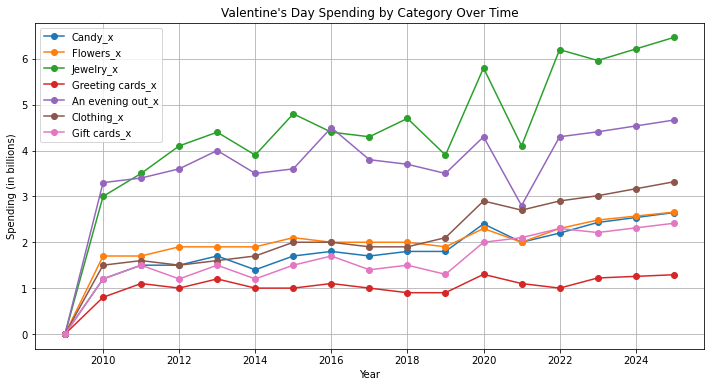

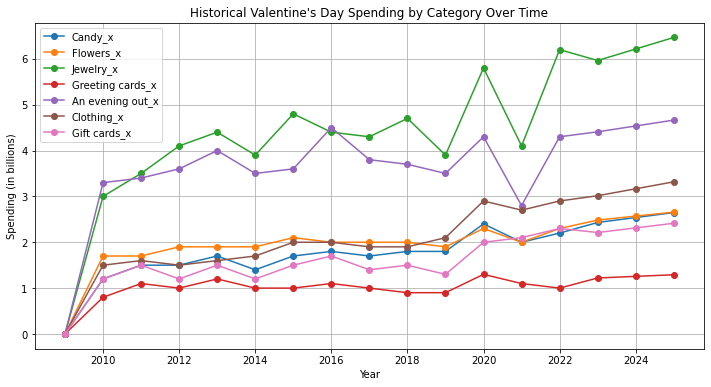

In [229]:
# Predict future spending across categories using Linear Regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

categories = ['Candy_x', 'Flowers_x', 'Jewelry_x', 'Greeting cards_x',
       'An evening out_x', 'Clothing_x', 'Gift cards_x']

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, column):
    if column in df.columns:
        df[column] = (
            df[column]
            .astype(str)
            .str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters except digits and decimal points
            .replace('', '0')  # Replace empty strings with '0'
            .astype(float)
        )
    else:
        print(f"Category {column} not found in merged_df")

# Apply cleaning and conversion to numeric for each category
for category in categories:
    clean_and_convert_to_numeric(merged_df, category)

# Prepare Data
X = merged_df["Year"].values.reshape(-1, 1)

# Fit Linear Regression Models for Each Category
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_linear_df = pd.DataFrame({"Year": [2023, 2024, 2025]})

for category in categories:
    if category in merged_df.columns:
        y = merged_df[category].values

        # Fit a Linear Regression Model
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        linear_pred = linear_model.predict(X)

        # Evaluate Model Performance
        mse = mean_squared_error(y, linear_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, linear_pred)
        print(f"Category: {category}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"R-squared (R2): {r2}")
        print("\n")

        # Forecast for future years
        predicted_spending_linear = linear_model.predict(future_years)

        # Store results in future_linear_df
        future_linear_df[category] = predicted_spending_linear

# Add future years to the DataFrame
for year in future_years.flatten():
    if year not in merged_df["Year"].values:
        new_row = {col: float('nan') for col in merged_df.columns}
        new_row["Year"] = year
        merged_df = merged_df.append(new_row, ignore_index=True)

# Fill in forecasted values for future years using future_linear_df
for category in categories:
    if category in merged_df.columns:
        for year in future_years.flatten():
            if year in future_linear_df["Year"].values:
                forecasted_value = future_linear_df.loc[future_linear_df["Year"] == year, category].values[0]
                merged_df.loc[merged_df["Year"] == year, category] = forecasted_value




# Plot category-wise spending trends
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)
    else:
        print(f"Category {category} not found in merged_df for plotting")

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Valentine's Day Spending by Category Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the Historical Data
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Historical Valentine's Day Spending by Category Over Time")
plt.legend()
plt.grid(True)
plt.show()


# Save the merged DataFrame to a CSV file
merged_df.to_csv("valentines_day_spending_forecast_x.csv", index=False)

Category: Candy_y
Mean Squared Error (MSE): 4.778458273155386
Root Mean Squared Error (RMSE): 2.1859684977499985
R-squared (R2): 0.6989030270419019


Category: Flowers_y
Mean Squared Error (MSE): 8.675283390894723
Root Mean Squared Error (RMSE): 2.9453834030385115
R-squared (R2): 0.4511471049059269


Category: Jewelry_y
Mean Squared Error (MSE): 45.28809133438015
Root Mean Squared Error (RMSE): 6.729642734527602
R-squared (R2): 0.560661864019486


Category: Greeting cards_y
Mean Squared Error (MSE): 3.3039915541601346
Root Mean Squared Error (RMSE): 1.8176885195654768
R-squared (R2): 0.27478652641229107


Category: An evening out_y
Mean Squared Error (MSE): 42.777438335949796
Root Mean Squared Error (RMSE): 6.5404463407285744
R-squared (R2): 0.27394495778833505


Category: Clothing_y
Mean Squared Error (MSE): 5.978760910517624
Root Mean Squared Error (RMSE): 2.4451504883171555
R-squared (R2): 0.7747191232792446


Category: Gift cards_y
Mean Squared Error (MSE): 5.3389228885399005
Root 

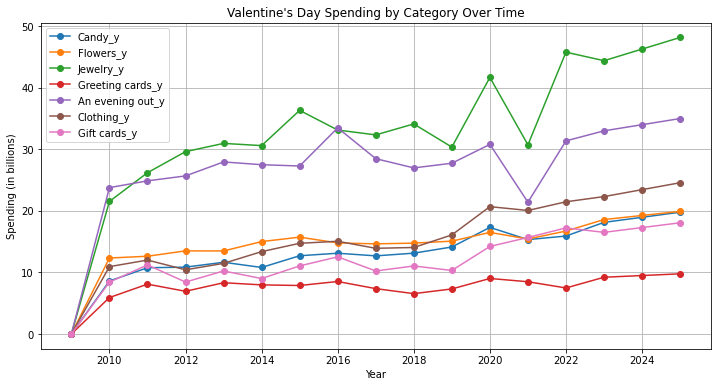

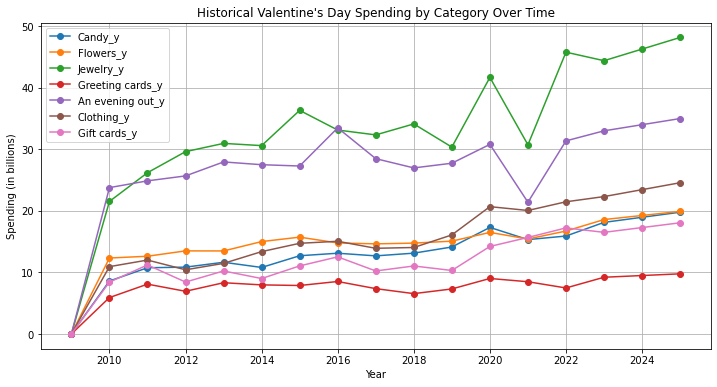

In [230]:
# Predict future spending across categories using Linear Regression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "merged_valentines_data.csv"  # Change this to your actual file path
merged_df = pd.read_csv(file_path)

categories = ['Candy_y',
       'Flowers_y', 'Jewelry_y', 'Greeting cards_y', 'An evening out_y',
       'Clothing_y', 'Gift cards_y']

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, column):
    if column in df.columns:
        df[column] = (
            df[column]
            .astype(str)
            .str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters except digits and decimal points
            .replace('', '0')  # Replace empty strings with '0'
            .astype(float)
        )
    else:
        print(f"Category {column} not found in merged_df")

# Apply cleaning and conversion to numeric for each category
for category in categories:
    clean_and_convert_to_numeric(merged_df, category)

# Prepare Data
X = merged_df["Year"].values.reshape(-1, 1)

# Fit Linear Regression Models for Each Category
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
future_linear_df = pd.DataFrame({"Year": [2023, 2024, 2025]})

for category in categories:
    if category in merged_df.columns:
        y = merged_df[category].values

        # Fit a Linear Regression Model
        linear_model = LinearRegression()
        linear_model.fit(X, y)
        linear_pred = linear_model.predict(X)

        # Evaluate Model Performance
        mse = mean_squared_error(y, linear_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y, linear_pred)
        print(f"Category: {category}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"R-squared (R2): {r2}")
        print("\n")

        # Forecast for future years
        predicted_spending_linear = linear_model.predict(future_years)

        # Store results in future_linear_df
        future_linear_df[category] = predicted_spending_linear

# Add future years to the DataFrame
for year in future_years.flatten():
    if year not in merged_df["Year"].values:
        new_row = {col: float('nan') for col in merged_df.columns}
        new_row["Year"] = year
        merged_df = merged_df.append(new_row, ignore_index=True)

# Fill in forecasted values for future years using future_linear_df
for category in categories:
    if category in merged_df.columns:
        for year in future_years.flatten():
            if year in future_linear_df["Year"].values:
                forecasted_value = future_linear_df.loc[future_linear_df["Year"] == year, category].values[0]
                merged_df.loc[merged_df["Year"] == year, category] = forecasted_value




# Plot category-wise spending trends
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)
    else:
        print(f"Category {category} not found in merged_df for plotting")

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Valentine's Day Spending by Category Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Visualize the Historical Data
plt.figure(figsize=(12, 6))
for category in categories:
    if category in merged_df.columns:
        plt.plot(merged_df["Year"], merged_df[category], marker="o", linestyle="-", label=category)

plt.xlabel("Year")
plt.ylabel("Spending (in billions)")
plt.title("Historical Valentine's Day Spending by Category Over Time")
plt.legend()
plt.grid(True)
plt.show()


# Save the merged DataFrame to a CSV file
merged_df.to_csv("valentines_day_spending_forecast_y.csv", index=False)

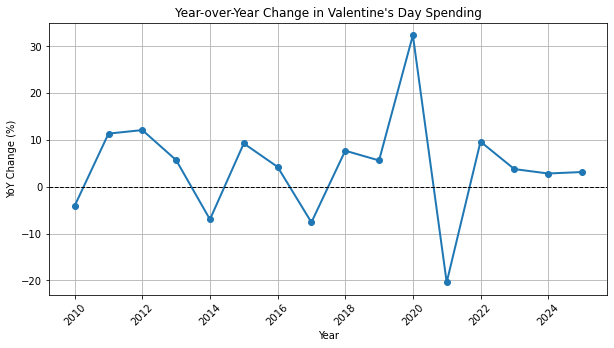

In [235]:
import pandas as pd

# Load the data
df = pd.read_csv("merged_valentines_data_predicted.csv")

# Remove currency symbols and convert to float (example for per-person spend)
df['Per person Expected Valentines Day Spend'] = (
    df['Per person Expected Valentines Day Spend']
    .replace({'\$': '', ',': '', 'B': ''}, regex=True)
    .astype(float)
)

# Handle duplicate columns (for example, merging candy_x and candy_y if appropriate)
# This depends on the dataset's context.

# Calculate year-over-year change in total spending (after cleaning)
df['Total_Spending_Num'] = (
    df['Total Expected Valentine\'s Day Spending (in billions)']
    .replace({'\$': '', 'B': ''}, regex=True).astype(float)
)

df['YoY_Change'] = df['Total_Spending_Num'].pct_change() * 100

# Plot Year-over-Year Change
plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['YoY_Change'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('YoY Change (%)')
plt.title("Year-over-Year Change in Valentine's Day Spending")
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()